In [37]:
#Chase Stalcup
#11-27-2024
#Data Mining

Unique values in Winner column: ['Red' 'Blue' 'Draw']
Unique values in y after cleaning: {0, 1}
Unique classes in y: {0, 1}
Confusion Matrix:
 [[ 50 335]
 [ 44 752]]


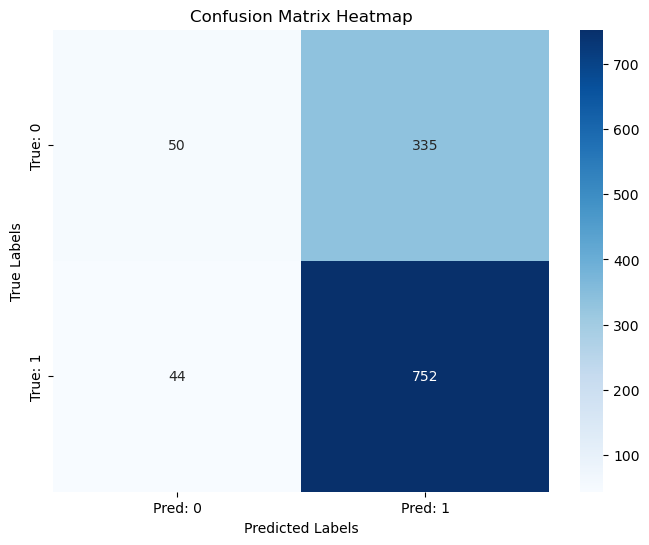

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.13      0.21       385
           1       0.69      0.94      0.80       796

    accuracy                           0.68      1181
   macro avg       0.61      0.54      0.50      1181
weighted avg       0.64      0.68      0.61      1181

ROC-AUC Score: 0.6475885923122104
Unique values in y_test: {0, 1}
Sample probabilities: [0.8418293  0.59890117 0.62363523 0.63503463 0.59669865]
ROC-AUC Score: 0.6475885923122104


In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load Data
data = pd.read_csv("fight_data.csv")

# Check unique values in 'Winner' column
print("Unique values in Winner column:", data["Winner"].unique())

# Filter out rows with invalid 'Winner' values
valid_winners = ["Red", "Blue"]  # Define valid categories
data = data[data["Winner"].isin(valid_winners)].copy()

# Re-encode 'Winner' as binary
y = LabelEncoder().fit_transform(data["Winner"])  # Red=1, Blue=0
print("Unique values in y after cleaning:", set(y))

# Re-run the remaining steps as before


# Select Relevant Features
features = [
    "B_avg_SIG_STR_pct", "B_avg_TD_pct", "B_avg_CTRL_time(seconds)", 
    "B_total_time_fought(seconds)", "B_wins", "B_losses", "B_draw", 
    "R_avg_SIG_STR_pct", "R_avg_TD_pct", "R_avg_CTRL_time(seconds)", 
    "R_total_time_fought(seconds)", "R_wins", "R_losses", "R_draw",
    "R_Height_cms", "R_Reach_cms", "B_Height_cms", "B_Reach_cms", 
    "B_age", "R_age"
]

X = data[features].copy()  # Explicit copy to avoid SettingWithCopyWarning
y = LabelEncoder().fit_transform(data["Winner"])  # Red=1, Blue=0

# Ensure 'y' is binary
print("Unique classes in y:", set(y))  # Should output: {0, 1}

# Handle Missing Values
X = X.fillna(X.median())  # Avoid inplace modification

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression Model
model = LogisticRegression(multi_class="ovr")  # Explicitly set multi_class
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))  # Handle undefined metrics

# ROC-AUC Score
try:
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])  # Binary class probabilities
    print("ROC-AUC Score:", roc_auc)
except ValueError as e:
    print(f"Error calculating ROC-AUC: {e}")

# Debug y_test and predicted probabilities
print("Unique values in y_test:", set(y_test))

# Check if predict_proba works
if hasattr(model, "predict_proba"):
    try:
        proba = model.predict_proba(X_test)[:, 1]
        print("Sample probabilities:", proba[:5])  # Display a few probabilities
        
        # Calculate ROC-AUC Score
        roc_auc = roc_auc_score(y_test, proba)
        print("ROC-AUC Score:", roc_auc)
    except Exception as e:
        print(f"Error calculating ROC-AUC: {e}")
else:
    print("The model does not support predict_proba.")


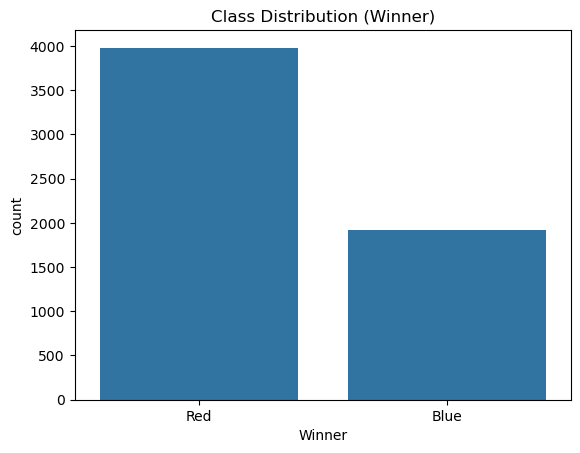

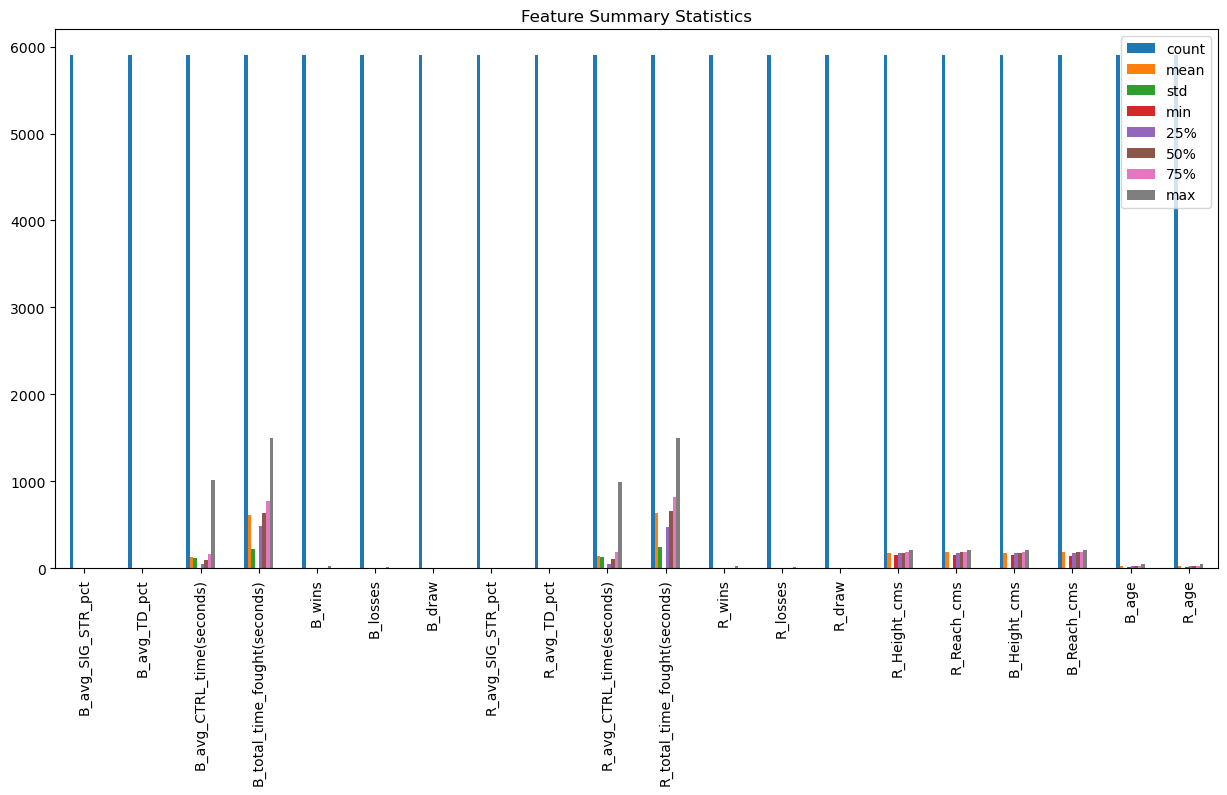

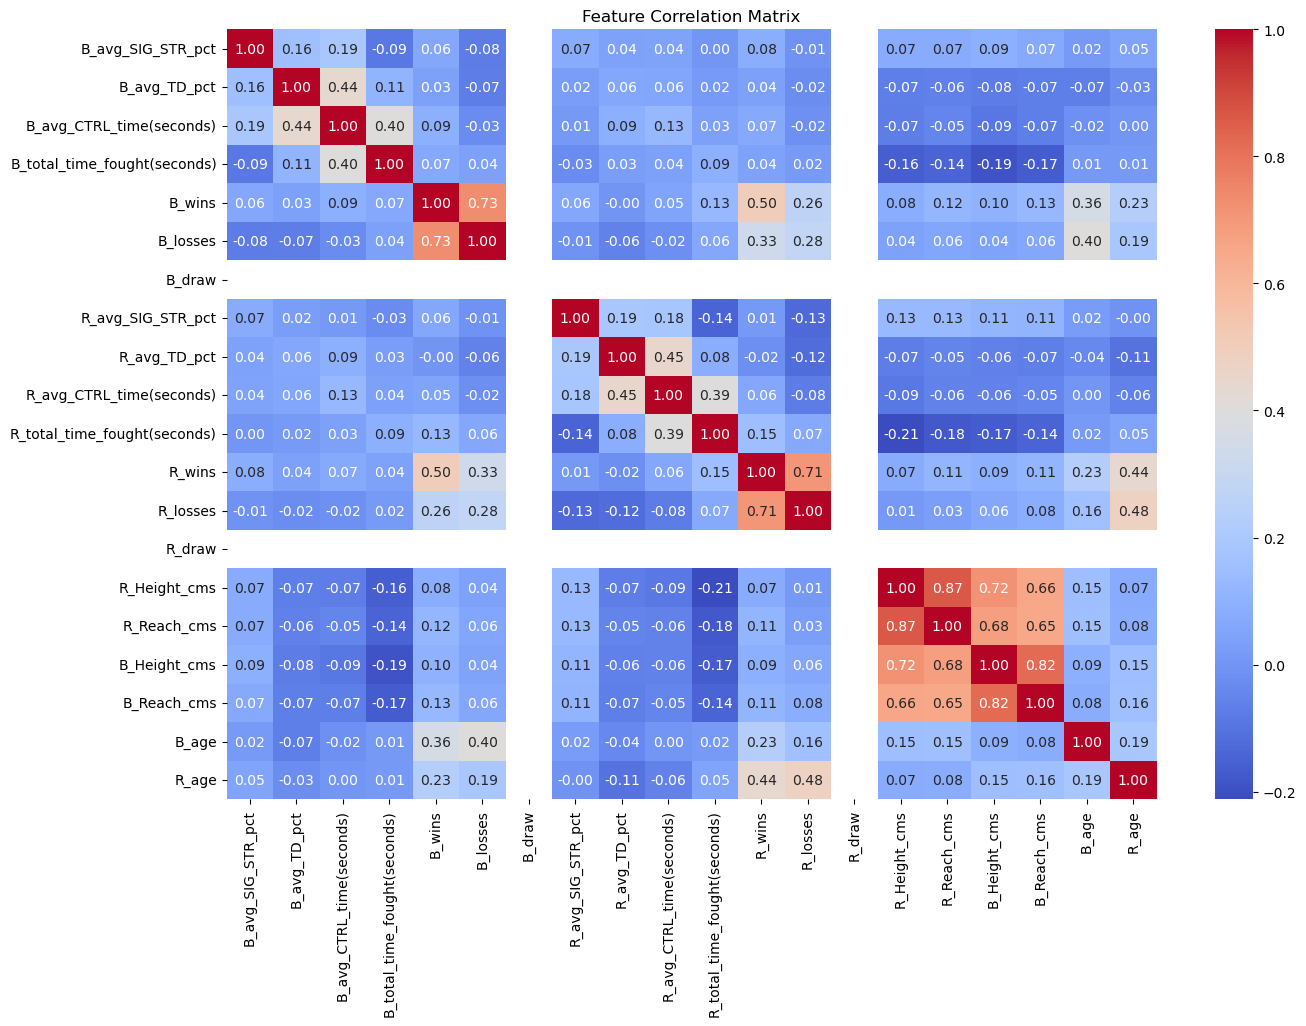

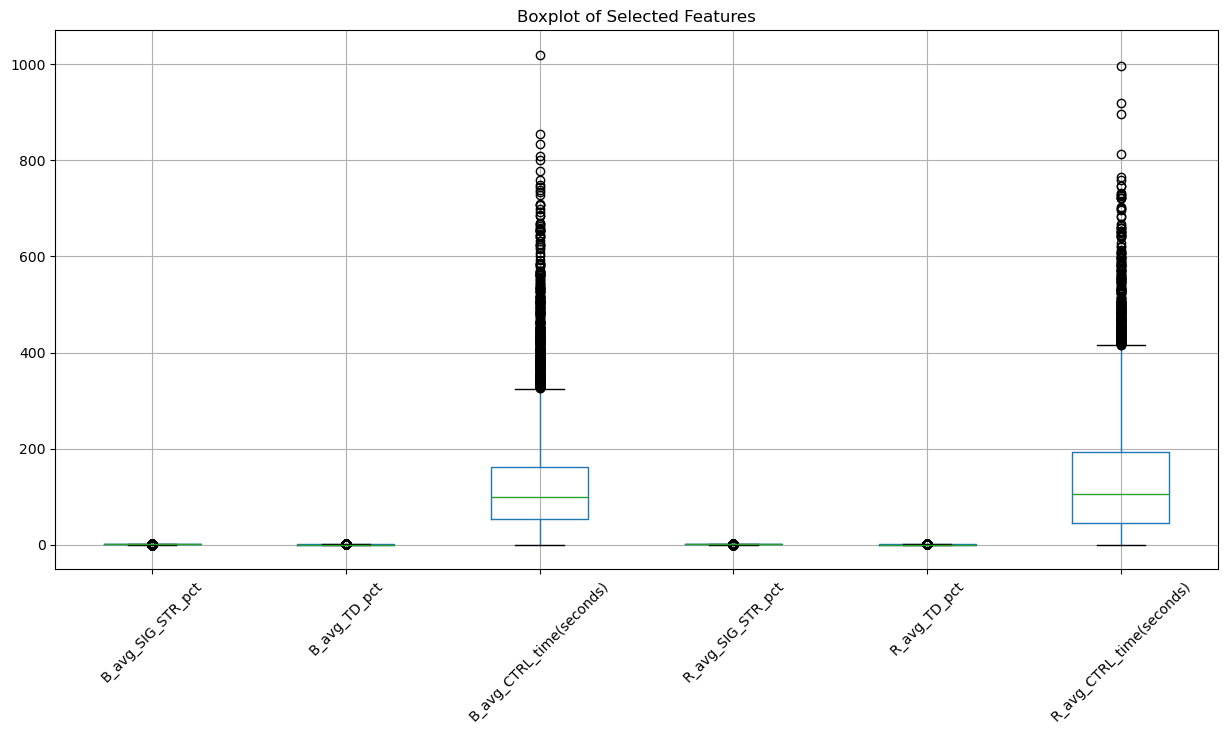

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class Distribution
sns.countplot(x=data["Winner"])
plt.title("Class Distribution (Winner)")
plt.show()

# Feature Distributions
X.describe().transpose().plot(kind="bar", figsize=(15, 7), title="Feature Summary Statistics")
plt.show()

# Pairwise Correlations
correlation_matrix = X.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

# Outlier Detection (Boxplots for selected features)
numeric_features = [
    "B_avg_SIG_STR_pct", "B_avg_TD_pct", "B_avg_CTRL_time(seconds)", 
    "R_avg_SIG_STR_pct", "R_avg_TD_pct", "R_avg_CTRL_time(seconds)"
]

plt.figure(figsize=(15, 7))
X[numeric_features].boxplot()
plt.title("Boxplot of Selected Features")
plt.xticks(rotation=45)
plt.show()


Columns in X: Index(['B_avg_SIG_STR_pct', 'B_avg_TD_pct', 'B_avg_CTRL_time(seconds)',
       'B_total_time_fought(seconds)', 'B_wins', 'B_losses', 'B_draw',
       'R_avg_SIG_STR_pct', 'R_avg_TD_pct', 'R_avg_CTRL_time(seconds)',
       'R_total_time_fought(seconds)', 'R_wins', 'R_losses', 'R_draw',
       'R_Height_cms', 'R_Reach_cms', 'B_Height_cms', 'B_Reach_cms', 'B_age',
       'R_age'],
      dtype='object')
Confusion Matrix:
 [[ 49 336]
 [ 45 751]]


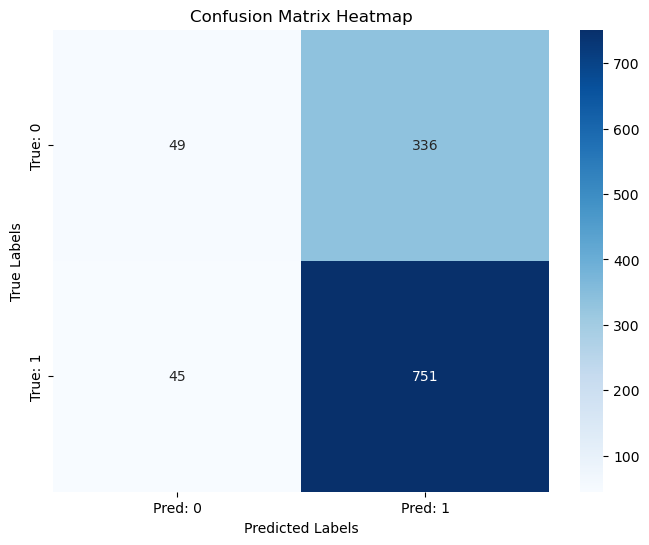

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.13      0.20       385
           1       0.69      0.94      0.80       796

    accuracy                           0.68      1181
   macro avg       0.61      0.54      0.50      1181
weighted avg       0.64      0.68      0.60      1181

ROC-AUC Score: 0.6474645957058018


In [93]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Feature Engineering based on EDA insights

# Ensure column names are stripped of any leading or trailing spaces if X is a DataFrame
# If X is a NumPy array, you should have column names stored separately (e.g., in a list 'feature_names')
if isinstance(X, pd.DataFrame):
    X.columns = X.columns.str.strip()

# Check the column names to ensure they exist in the data (only if X is a DataFrame)
if isinstance(X, pd.DataFrame):
    print("Columns in X:", X.columns)

# Try block to handle missing columns and feature engineering
try:
    # Difference features (based on performance differences between fighters)
    X["SIG_STR_pct_diff"] = X["R_avg_SIG_STR_pct"] - X["B_avg_SIG_STR_pct"]
    X["TD_pct_diff"] = X["R_avg_TD_pct"] - X["B_avg_TD_pct"]
    X["CTRL_time_diff"] = X["R_avg_CTRL_time(seconds)"] - X["B_avg_CTRL_time(seconds)"]
    X["Age_diff"] = X["R_age"] - X["B_age"]
    X["Experience_diff"] = (X["R_wins"] + X["R_losses"]) - (X["B_wins"] + X["B_losses"])

    # Interaction features (capturing combined information from fighters' attributes)
    X["Fighter_experience"] = (X["R_wins"] + X["R_losses"]) - (X["B_wins"] + X["B_losses"])

    # Normalized features (to compare fighter sizes)
    X["Normalized_Height"] = (X["R_Height_cms"] + X["B_Height_cms"]) / 2
    X["Normalized_Reach"] = (X["R_Reach_cms"] + X["B_Reach_cms"]) / 2

    # Log transform for skewed features (optional, if necessary after inspection)
    X["Log_R_Height"] = np.log(X["R_Height_cms"] + 1)
    X["Log_B_Height"] = np.log(X["B_Height_cms"] + 1)

    # Handle missing values (if not already done)
    X = X.fillna(X.median())

except KeyError as e:
    print(f"Error in feature engineering: Missing column {e}")

# Ensure features are on a similar scale (convert back to DataFrame if necessary)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# If X is scaled, convert it back to DataFrame with column names after scaling (if needed)
if isinstance(X, pd.DataFrame):
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Model Training
model = LogisticRegression(multi_class="ovr")
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))

# ROC-AUC Score
try:
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])  # Binary class probabilities
    print("ROC-AUC Score:", roc_auc)
except Exception as e:
    print(f"Error calculating ROC-AUC: {e}")


In [71]:
# Step 1: Import required libraries
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Step 2: Split your data into train and test sets (if not done already)
# Assuming you have X (features) and y (target) prepared
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define SMOTE and your Logistic Regression model
smote = SMOTE(sampling_strategy='auto', random_state=42)
model = LogisticRegression(solver='liblinear', max_iter=1000, class_weight='balanced')

# Step 4: Create a pipeline to first apply SMOTE and then fit the Logistic Regression model
pipeline = Pipeline([('smote', smote), ('logreg', model)])

# Step 5: Fit the model
pipeline.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = pipeline.predict(X_test)

# Step 7: Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc}")


Confusion Matrix:
[[235 154]
 [301 491]]

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.60      0.51       389
           1       0.76      0.62      0.68       792

    accuracy                           0.61      1181
   macro avg       0.60      0.61      0.60      1181
weighted avg       0.65      0.61      0.63      1181

ROC-AUC Score: 0.6528946275090235


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Set up the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Create a pipeline with SMOTE and Random Forest
pipeline = Pipeline([('smote', smote), ('rf', rf_model)])

# Define the parameter grid for Random Forest
param_grid = {
    'rf__n_estimators': [50, 100, 200],  # Number of trees
    'rf__max_depth': [None, 10, 20, 30],  # Depth of trees
    'rf__min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'rf__min_samples_leaf': [1, 2, 4],    # Minimum samples in a leaf node
    'rf__max_features': ['sqrt', 'log2', None]  # Feature selection strategy
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate on the whole dataset with best parameters
best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(X)

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y, y_pred)
print("Classification Report:")
print(class_report)

roc_auc = roc_auc_score(y, best_pipeline.predict_proba(X)[:, 1])
print("ROC-AUC Score:", roc_auc)


Best Hyperparameters: {'rf__max_depth': 30, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 10, 'rf__n_estimators': 100}
Best Cross-Validation Score: 0.6416630548658849
Confusion Matrix:
[[1765  158]
 [  47 3932]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95      1923
           1       0.96      0.99      0.97      3979

    accuracy                           0.97      5902
   macro avg       0.97      0.95      0.96      5902
weighted avg       0.97      0.97      0.96      5902

ROC-AUC Score: 0.9924964879972429


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Set up the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Create a pipeline with SMOTE and Random Forest
pipeline = Pipeline([('smote', smote), ('rf', rf_model)])

# Fit the model using cross-validation
cross_val_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cross_val_scores)
print("Mean Cross-Validation Accuracy:", cross_val_scores.mean())

# Train the model on the whole dataset
pipeline.fit(X, y)

# Make predictions
y_pred = pipeline.predict(X)

# Confusion Matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y, y_pred)
print("Classification Report:")
print(class_report)

# ROC-AUC Score
roc_auc = roc_auc_score(y, pipeline.predict_proba(X)[:, 1])
print("ROC-AUC Score:", roc_auc)


Cross-Validation Accuracy Scores: [0.56731583 0.58594412 0.63305085 0.66525424 0.70423729]
Mean Cross-Validation Accuracy: 0.6311604644153905
Confusion Matrix:
[[1923    0]
 [   0 3979]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1923
           1       1.00      1.00      1.00      3979

    accuracy                           1.00      5902
   macro avg       1.00      1.00      1.00      5902
weighted avg       1.00      1.00      1.00      5902

ROC-AUC Score: 1.0


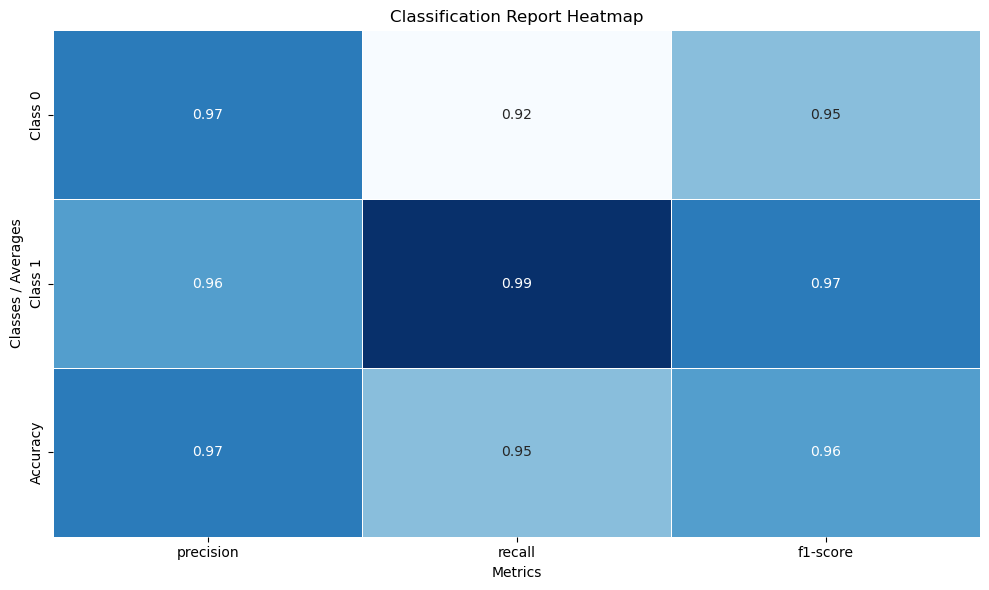

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data for the classification report
classification_report_data = {
    "precision": [0.97, 0.96, 0.97, 0.97, 0.97],
    "recall": [0.92, 0.99, 0.95, 0.95, 0.97],
    "f1-score": [0.95, 0.97, 0.96, 0.96, 0.96],
    "support": [1923, 3979, 5902, 5902, 5902]
}

# Index labels
labels = ['Class 0', 'Class 1', 'Accuracy', 'Macro avg', 'Weighted avg']

# Create a DataFrame
df_report = pd.DataFrame(classification_report_data, index=labels)

# Plot the classification report as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_report.iloc[:-2, :-1], annot=True, cmap="Blues", fmt=".2f", cbar=False, linewidths=0.5)

# Title and formatting
plt.title("Classification Report Heatmap")
plt.ylabel('Classes / Averages')
plt.xlabel('Metrics')
plt.tight_layout()
plt.show()